<a href="https://colab.research.google.com/github/ferdouszislam/Weather-WaterLevel-Prediction-ML/blob/main/Notebooks/brri-dataset/experimentations/decisionTree_weekly-all_classification_as_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_classification, eval_classification
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_classification, eval_classification, showEvalutationGraph_classification
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**Decision Tree Documentation link:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

In [4]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = DecisionTreeClassifier(random_state=RAND_SEED)

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = DecisionTreeClassifier
class_label = 'Rainfall'
x_axis_param_name = 'max_depth'

# hyper-parameters
max_depths = [x for x in range(1,31)]
criterions = ['gini', 'entropy']
splitters = ['best', 'random']
max_features = [None, 'sqrt']
class_weights = [None, 'balanced']

# dictonary of all hyperparameters
param_grid = {'max_depth': max_depths, 'criterion': criterions, 'splitter': splitters, 'max_features': max_features, 'class_weight': class_weights}

## 1. Experimentation on the Weather Weekly Dataset

In [5]:
# Load the train dataset
weather_weekly_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_weekly-all_train_classification.csv')

# Load the test set
weather_weekly_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_weekly-all_test_classification.csv')

### 1.0 No technique

In [6]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_weekly_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'splitter': 'best'}
Train set performance: accuracy=0.6816, macro-f1=0.447


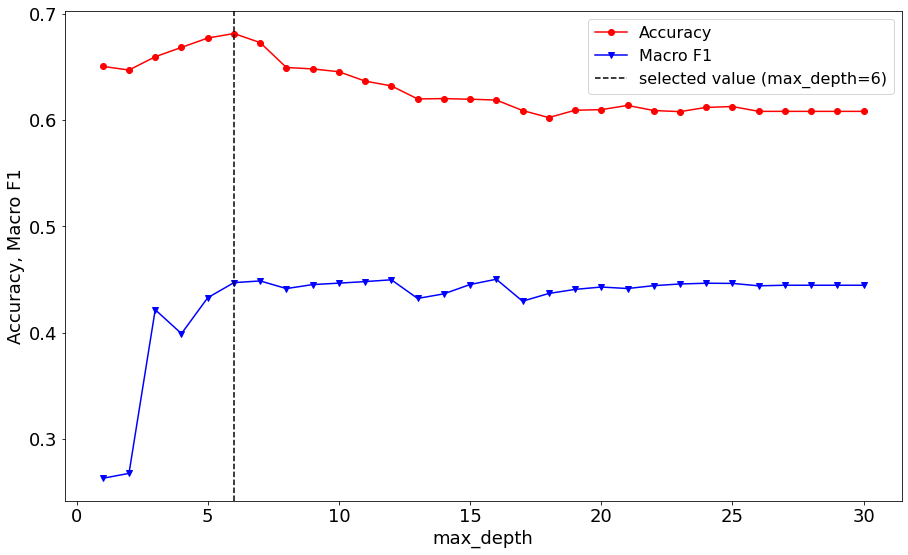

In [7]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_weekly_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=max_depths, 
                                    selected_model_params=selected_model_params)

In [8]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_weekly_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.6635, macro-f1=0.4125


### 1.1 Apply Pearson Feature Selection to Weekly Weather Dataset

In [14]:
# select features from the train dataset
weather_weekly_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_weekly_train_df, class_label)

# keep only selected features on the test dataset
weather_weekly_fs1_test_df = weather_weekly_test_df.drop(columns=cols_to_drop)

dropping Max Temp. (degree Celcius)1 from (Max Temp. (degree Celcius)1, Max Temp. (degree Celcius)0)
dropping Max Temp. (degree Celcius)2 from (Max Temp. (degree Celcius)2, Max Temp. (degree Celcius)0)
dropping Max Temp. (degree Celcius)3 from (Max Temp. (degree Celcius)4, Max Temp. (degree Celcius)3)
dropping Max Temp. (degree Celcius)4 from (Max Temp. (degree Celcius)5, Max Temp. (degree Celcius)4)
dropping Max Temp. (degree Celcius)6 from (Max Temp. (degree Celcius)6, Max Temp. (degree Celcius)5)
dropping Min Temp. (degree Celcius)0 from (Min Temp. (degree Celcius)1, Min Temp. (degree Celcius)0)
dropping Min Temp. (degree Celcius)2 from (Min Temp. (degree Celcius)2, Min Temp. (degree Celcius)1)
dropping Min Temp. (degree Celcius)1 from (Min Temp. (degree Celcius)3, Min Temp. (degree Celcius)1)
dropping Min Temp. (degree Celcius)3 from (Min Temp. (degree Celcius)4, Min Temp. (degree Celcius)3)
dropping Min Temp. (degree Celcius)5 from (Min Temp. (degree Celcius)5, Min Temp. (degree C

In [15]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_weekly_fs1_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
Train set performance: accuracy=0.6813, macro-f1=0.4388


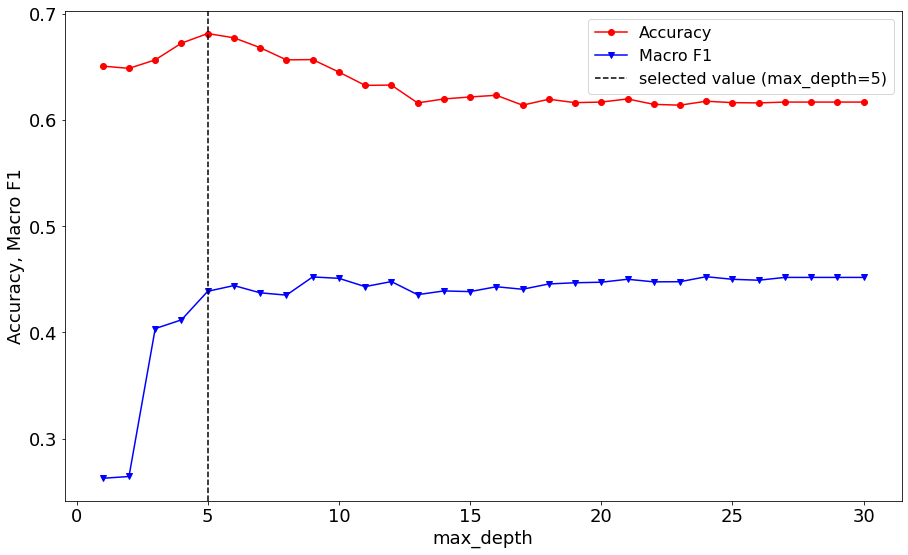

In [16]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_weekly_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=max_depths, 
                                selected_model_params=selected_model_params)

In [17]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_weekly_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.6912, macro-f1=0.4453


### 1.5 Pearson Feature Selection + Hybrid Sampling to Weekly Weather Dataset

In [10]:
# select features from the train dataset
weather_weekly_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_weekly_train_df, class_label)

# keep only selected features on the test dataset
weather_weekly_fs1_test_df = weather_weekly_test_df.drop(columns=cols_to_drop)

dropping Max Temp. (degree Celcius)1 from (Max Temp. (degree Celcius)1, Max Temp. (degree Celcius)0)
dropping Max Temp. (degree Celcius)2 from (Max Temp. (degree Celcius)2, Max Temp. (degree Celcius)0)
dropping Max Temp. (degree Celcius)3 from (Max Temp. (degree Celcius)4, Max Temp. (degree Celcius)3)
dropping Max Temp. (degree Celcius)4 from (Max Temp. (degree Celcius)5, Max Temp. (degree Celcius)4)
dropping Max Temp. (degree Celcius)6 from (Max Temp. (degree Celcius)6, Max Temp. (degree Celcius)5)
dropping Min Temp. (degree Celcius)0 from (Min Temp. (degree Celcius)1, Min Temp. (degree Celcius)0)
dropping Min Temp. (degree Celcius)2 from (Min Temp. (degree Celcius)2, Min Temp. (degree Celcius)1)
dropping Min Temp. (degree Celcius)1 from (Min Temp. (degree Celcius)3, Min Temp. (degree Celcius)1)
dropping Min Temp. (degree Celcius)3 from (Min Temp. (degree Celcius)4, Min Temp. (degree Celcius)3)
dropping Min Temp. (degree Celcius)5 from (Min Temp. (degree Celcius)5, Min Temp. (degree C

In [11]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_weekly_fs1_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {0: 2442, 1: 1005, 2: 306}
class distribution after sampling: {0: 1953, 1: 1953, 2: 1953}
Selected hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'max_features': None, 'splitter': 'random'}
Train set performance: accuracy=0.7308, macro-f1=0.7286


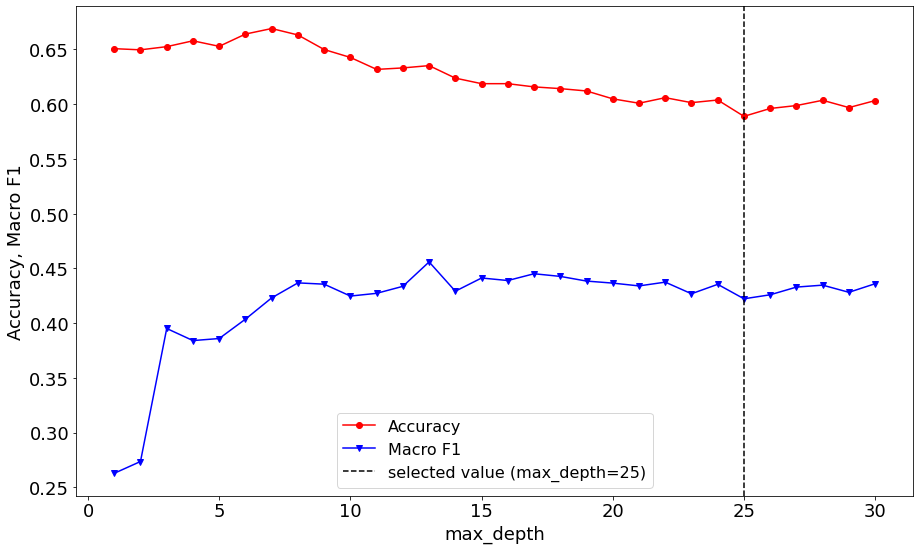

In [12]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_weekly_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=max_depths, 
                                selected_model_params=selected_model_params)

In [13]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_weekly_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.5506, macro-f1=0.4323
